<a href="https://colab.research.google.com/github/mohitraj/AIChatbot/blob/main/OAI_Vision_API_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai
!pip install -q gradio

In [ ]:
# Downloading demo images
import os
os.mkdir('images')
!wget -q -O images/cheetah1.jpg https://github.com/gradio-app/gradio/raw/main/demo/image_mod/images/cheetah1.jpg
!wget -q -O images/lion.jpg https://github.com/gradio-app/gradio/raw/main/demo/image_mod/images/lion.jpg
!wget -q -O images/tower.jpg https://github.com/gradio-app/gradio/raw/main/demo/image_mod/images/tower.jpg

In [ ]:
import openai
from getpass import getpass
openai.api_key = getpass("Please enter your OpenAI Api Key: ")

Please enter your OpenAI Api Key: ··········


# OAI Vision Api Test

In [ ]:
import base64

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

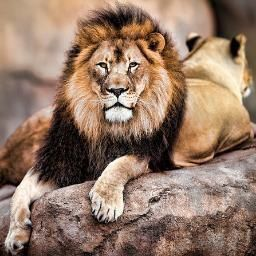

The image displays two lions—a prominent male lion with a full, dark
mane looking directly at the camera and a lioness lying down facing
away from the camera. They appear to be resting on a rock surface,
which is typical of their natural habitat where such vantage points
are used for rest and observation. The sharp focus on the male lion's
face highlights its features and expressions, contributing to a
captivating wildlife portrait.


In [ ]:
from IPython.display import display, Image
import textwrap

image_path = '/content/images/lion.jpg'
encoded_image = encode_image(image_path)

result = openai.chat.completions.create(
    model = "gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text",
                "text": "Can you please tell me what is displayed on this image?"},
                {"type": "image_url",
                "image_url": f"data:image/jpeg;base64,{encoded_image}"},
            ]
        },
    ],
    max_tokens=300
)

display(Image(image_path))
print(textwrap.fill(result.choices[0].message.content, width=70))

# Image Captioning AI App with Gradio

In [ ]:
def caption_image(image_path):
  encoded_image = encode_image(image_path)

  result = openai.chat.completions.create(
    model = "gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text",
                "text": "Please provide a descriptive caption for the image along with 10-15 relevant tags."},
                {"type": "image_url",
                "image_url": f"data:image/jpeg;base64,{encoded_image}"},
            ]
        },
    ],
    max_tokens=300,
    )

  return result.choices[0].message.content

In [ ]:
caption_image('/content/images/lion.jpg')

'Caption: A regal male lion with a full mane rests on a rocky outcrop, accompanied by a lioness in the background.\n\nTags: #lion, #lioness, #wildlife, #savannah, #predator, #bigcat, #nature, #mammal, #africanwildlife, #kingofthejungle, #feline, #conservation, #animalportrait, #wildlifephotography, #animalkingdom'

In [ ]:
import gradio as gr
import os


demo = gr.Interface(
    caption_image,
    gr.Image(type="filepath"),
    "text",
    examples=[
        os.path.join(os.path.abspath(''), "images/cheetah1.jpg"),
        os.path.join(os.path.abspath(''), "images/lion.jpg"),
        os.path.join(os.path.abspath(''), "images/tower.jpg"),
    ],
)

if __name__ == "__main__":
    demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://198dff1fae50740b77.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
